![](https://i.postimg.cc/CMvcRBYb/Screenshot-2025-08-07-105337.png)

<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Importing Libraries</span>


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix

2025-08-21 17:09:57.890940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755796198.112807      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755796198.177861      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Dataset paths</span>


In [2]:
base_dir = '/kaggle/input/rockpaperscissors/rps-cv-images'
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

print("Paper images:", len(os.listdir(paper_dir)))
print("Rock images:", len(os.listdir(rock_dir)))
print("Scissors images:", len(os.listdir(scissors_dir)))


Paper images: 712
Rock images: 726
Scissors images: 750


<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Sample images from each class</span>


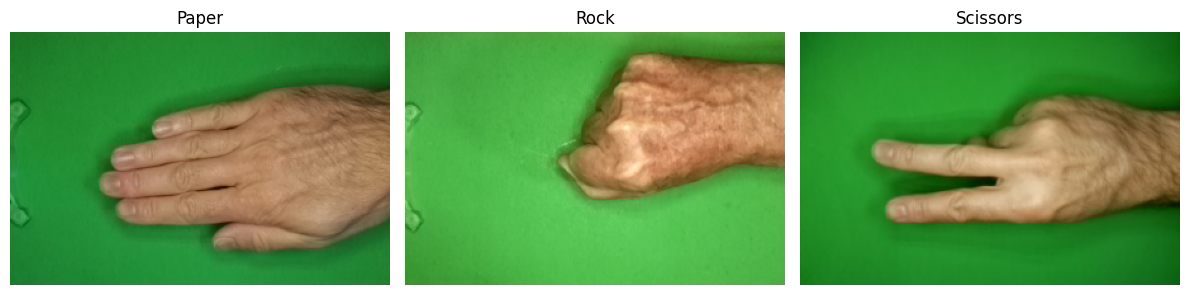

In [3]:

import random
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, folder, title in zip(axes,[paper_dir, rock_dir, scissors_dir],["Paper", "Rock", "Scissors"]):
    img_name = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, img_name)
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Data generators</span>


In [4]:

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    class_mode='categorical', # dataset has more than 2 classes
    batch_size=32,
    subset='training', # Because of validation split in ImageDataGenerator
    seed=42
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32,
    subset='validation',
    seed=42,
    shuffle=False 
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Model Building</span>


In [5]:

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1755797117.400374      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Callbacks</span>


In [6]:

ckpt = callbacks.ModelCheckpoint(
    'rps_model.h5',
    save_best_only=True,
    monitor='val_accuracy'
)
early = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Training the Model</span>


In [7]:

history = model.fit(
    train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[ckpt, early]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1755797670.957898     121 service.cc:148] XLA service 0x7cc76c003e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755797670.958681     121 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1755797671.355798     121 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/55 ━━━━━━━━━━━━━━━━━━━━ 6:30 7s/step - accuracy: 0.2188 - loss: 1.1142

I0000 00:00:1755797674.994867     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/55 ━━━━━━━━━━━━━━━━━━━━ 43s 671ms/step - accuracy: 0.3564 - loss: 1.1872 - val_accuracy: 0.7529 - val_loss: 0.7167
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.7512 - loss: 0.6330 - val_accuracy: 0.8741 - val_loss: 0.3690
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 341ms/step - accuracy: 0.8226 - loss: 0.4355 - val_accuracy: 0.8833 - val_loss: 0.3353
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 354ms/step - accuracy: 0.8708 - loss: 0.3552 - val_accuracy: 0.9199 - val_loss: 0.2203
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - accuracy: 0.9156 - loss: 0.2550 - val_accuracy: 0.9428 - val_loss: 0.1634
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 341ms/step - accuracy: 0.9326 - loss: 0.1960 - val_accuracy: 0.9382 - val_loss: 0.1692
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - accuracy: 0.9374 - loss: 0.1680 - val_accuracy: 0.9542 - val_loss: 0.1131
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 348ms/step - accuracy: 0.9514 - loss: 0.1294 - val_accuracy: 0.979

<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Plot metrics</span>


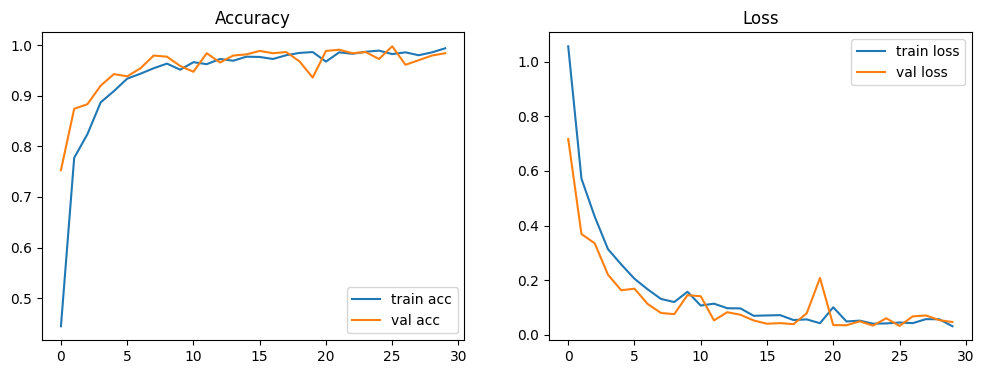

In [8]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title('Loss')
plt.show()


<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Evaluation</span>


In [9]:

val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation accuracy: {val_acc:.4f}")

# Confusion matrix & report
Y_true = val_gen.classes
Y_pred = np.argmax(model.predict(val_gen), axis=1)
print(classification_report(
    Y_true, Y_pred,
    target_names=list(train_gen.class_indices.keys())
))
print(confusion_matrix(Y_true, Y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.9783 - loss: 0.0483
Validation accuracy: 0.9886
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step
              precision    recall  f1-score   support

       paper       1.00      0.97      0.99       142
        rock       0.98      1.00      0.99       145
    scissors       0.99      0.99      0.99       150

    accuracy                           0.99       437
   macro avg       0.99      0.99      0.99       437
weighted avg       0.99      0.99      0.99       437

[[138   2   2]
 [  0 145   0]
 [  0   1 149]]


In [10]:
# ==============================
# Save model
# ==============================
model.save('rps_cnn_model.h5')


<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Prediction function</span>


In [11]:
from tensorflow.keras.models import load_model

# Path to your saved model
model = load_model("/kaggle/working/rps_cnn_model.h5")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
Actual Label:    scissors
Predicted Label: scissors
Confidence:      0.9999


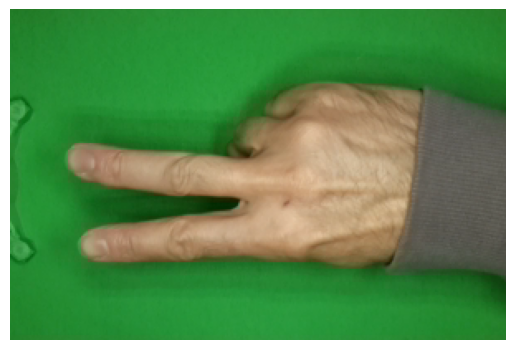

In [12]:

def predict_image(img_path):
    # Load the image and resize it to match the model input size
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))
    
    # Convert image to array and normalize (0 to 1)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    
    # Add batch dimension because model expects [batch, height, width, channels]
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict using the model
    prediction = model.predict(img_array)
    
    # Get class names
    classes = list(train_gen.class_indices.keys())
    
    # Predicted label
    predicted_label = classes[np.argmax(prediction)]
    
    # Actual label (from folder name of the image)
    actual_label = os.path.basename(os.path.dirname(img_path))
    
    # Print the results
    print("Actual Label:   ", actual_label)
    print("Predicted Label:", predicted_label)
    print("Confidence:     ", round(np.max(prediction), 4))
    
    # Show the image
    plt.imshow(plt.imread(img_path))
    plt.axis("off")
    plt.show()


# Pick a random image from ANY class
def get_random_image():
    # All class folders
    class_folders = [paper_dir, rock_dir, scissors_dir]
    
    # Pick one random folder
    chosen_folder = random.choice(class_folders)
    
    # Pick one random image from that folder
    chosen_image = random.choice(os.listdir(chosen_folder))
    
    # Full path to image
    return os.path.join(chosen_folder, chosen_image)

sample_img = get_random_image()
predict_image(sample_img)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# Class names (must match your training order)
classes = ["paper", "rock", "scissors"]

def predict_image(img_path):
    # Load and resize image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    
    # Convert to array and normalize
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    prediction = model.predict(img_array)
    
    # Get predicted label
    predicted_label = classes[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    # Show image + prediction
    plt.imshow(tf.keras.preprocessing.image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f})")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


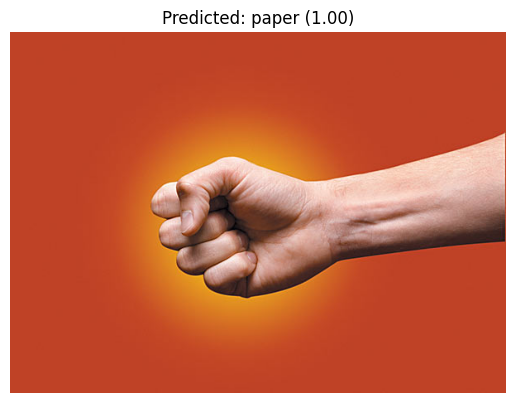

In [14]:
# Path where new images are uploaded in Kaggle
img_path = "/kaggle/input/rock-paper-scissors/rock.jpg"

predict_image(img_path)


<div style="background-color:rgb(230,0,0); padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Transfer Learning</h2>
</div>


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix
import random

# 1. Dataset paths


In [16]:

base_dir = '/kaggle/input/rockpaperscissors/rps-cv-images'
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

print("Paper images:", len(os.listdir(paper_dir)))
print("Rock images:", len(os.listdir(rock_dir)))
print("Scissors images:", len(os.listdir(scissors_dir)))

Paper images: 712
Rock images: 726
Scissors images: 750


# 2. Sample images from each class

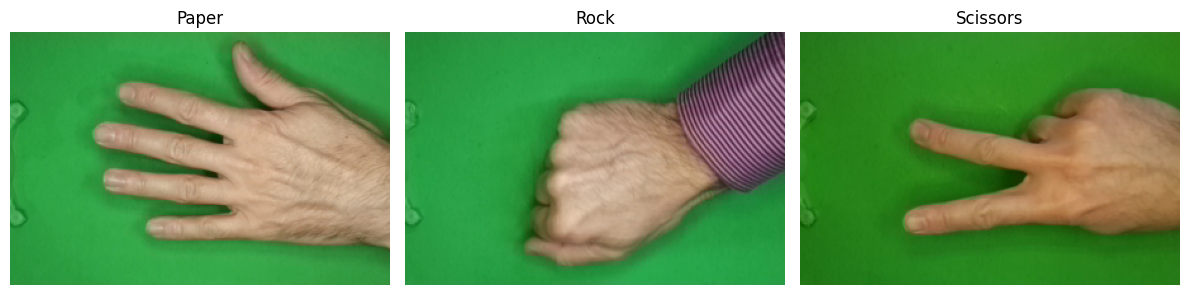

In [17]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, folder, title in zip(
    axes,
    [paper_dir, rock_dir, scissors_dir],
    ["Paper", "Rock", "Scissors"]
):
    img_name = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, img_name)
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


# 3. Data generators

In [18]:

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),  # MobileNetV2 expects 224x224
    class_mode='categorical',
    batch_size=32,
    subset='training',
    seed=42
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='validation',
    seed=42,
    shuffle=False
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


# 4. Transfer Learning Model

In [19]:

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
base_model.trainable = False

# Add custom layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# 5. Callbacks

In [20]:

ckpt = callbacks.ModelCheckpoint(
    'rps_transfer_model.h5',
    save_best_only=True,
    monitor='val_accuracy'
)
early = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# 6. Train

In [21]:

history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
    callbacks=[ckpt, early]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 57s 809ms/step - accuracy: 0.7434 - loss: 0.6095 - val_accuracy: 0.9794 - val_loss: 0.0695
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 603ms/step - accuracy: 0.9742 - loss: 0.0883 - val_accuracy: 0.9931 - val_loss: 0.0238
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 608ms/step - accuracy: 0.9846 - loss: 0.0439 - val_accuracy: 0.9977 - val_loss: 0.0127
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 587ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9886 - val_loss: 0.0211
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 597ms/step - accuracy: 0.9918 - loss: 0.0339 - val_accuracy: 0.9931 - val_loss: 0.0167
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 600ms/step - accuracy: 0.9962 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 576ms/step - accuracy: 0.9953 - loss: 0.0177 - val_accuracy: 0.9977 - val_loss: 0.0121
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 548ms/step - accuracy: 0.9914 - loss: 0.0289 - val_accu

# 7. Evaluation

In [22]:

val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation accuracy: {val_acc:.4f}")

# Confusion matrix & report
Y_true = val_gen.classes
Y_pred = np.argmax(model.predict(val_gen), axis=1)
print(classification_report(
    Y_true, Y_pred,
    target_names=list(train_gen.class_indices.keys())
))
print(confusion_matrix(Y_true, Y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step - accuracy: 1.0000 - loss: 0.0050
Validation accuracy: 1.0000
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 757ms/step
              precision    recall  f1-score   support

       paper       1.00      0.99      1.00       142
        rock       0.99      1.00      1.00       145
    scissors       1.00      1.00      1.00       150

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

[[141   1   0]
 [  0 145   0]
 [  0   0 150]]


# 8. Prediction function on google images

In [23]:

def predict_with_saved_model(model_path, img_path, class_indices):
    # Load the saved model
    loaded_model = tf.keras.models.load_model(model_path)

    # Get class names in correct order
    classes = list(class_indices.keys())

    # Load & preprocess image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = loaded_model.predict(img_array, verbose=0)
    predicted_label = classes[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Show result
    plt.imshow(tf.keras.preprocessing.image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f})")
    plt.show()


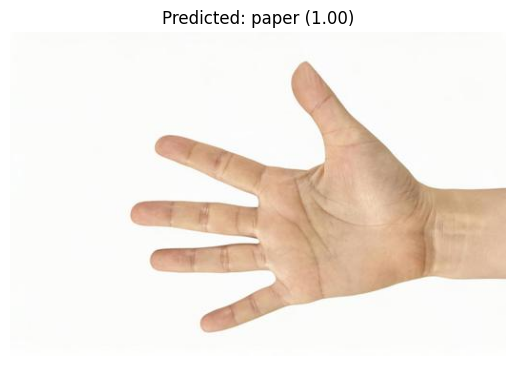

In [24]:
# Example usage after saving model
predict_with_saved_model("rps_transfer_model.h5", "/kaggle/input/rock-paper-scissors/74144ac70b25504f70817cf4962f295a_t.jpeg", train_gen.class_indices)

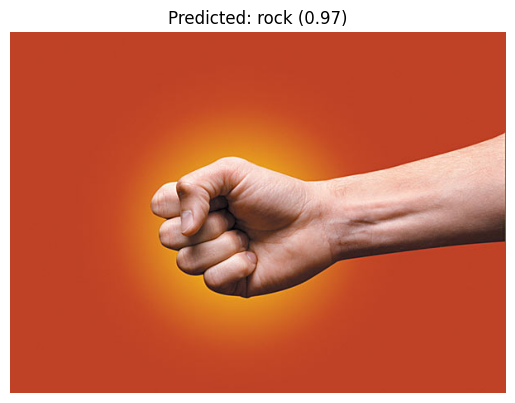

In [25]:
predict_with_saved_model("rps_transfer_model.h5", "/kaggle/input/rock-paper-scissors/rock.jpg", train_gen.class_indices)

<h3 style="color:#2E8B57;"> <u>Conclusion</u></h3>

<p style="font-size:16px">
The <strong style="color:#d9534f;">simple CNN</strong> struggled to correctly classify images with different backgrounds because it learned to rely heavily on the <span style="color:#5bc0de;">green background</span> present in all training images. It wasn’t robust enough to focus just on the <strong>hand shapes</strong>.
</p>

<p style="font-size:16px">
In contrast, the <strong style="color:#5cb85c;">transfer learning model</strong> (e.g. <code>MobileNetV2</code>) was already trained on a wide variety of images. This helped it focus on more meaningful features — like <strong>hand gestures</strong> — rather than the background. As a result, it performed <strong style="color:#f0ad4e;">much better</strong> across varied backgrounds and lighting conditions.
</p>


<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Smash That Upvote !! Thanks ! 🚀😃</span>
